$$
V(x,y,z) = k \left( \frac{q_1}{\sqrt{x^2 + y^2}} + \frac{q_2}{\sqrt{(x - a)^2 + (y - b)^2}} \right)
$$

Titik kritis (4.14213562373095, 3.3137084989847603)
Nilai determinan: -0.0002616218055473436
Titik (4.14213562373095, 3.3137084989847603) adalah saddle point karena determinan H kurang  dari 0


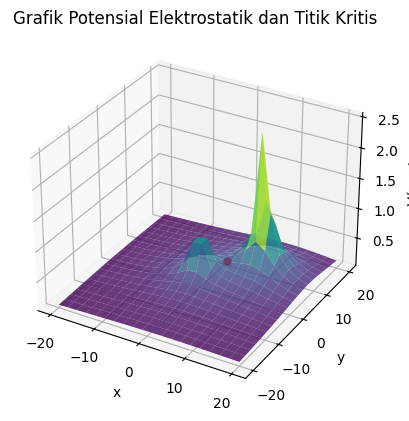

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi potensial
def V(x, y, a=10, b=8, q1=1, q2=2):
    return q1 / np.sqrt(x**2 + y**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2)

# Turunan pertama
def dV_dx(x, y, a=10, b=8, q1=1, q2=2):
    return -q1 * x / (x**2 + y**2)**(3/2) - q2 * (x - a) / ((x - a)**2 + (y - b)**2)**(3/2)

def dV_dy(x, y, a=10, b=8, q1=1, q2=2):
    return -q1 * y / (x**2 + y**2)**(3/2) - q2 * (y - b) / ((x - a)**2 + (y - b)**2)**(3/2)

# Turunan kedua
def d2V_dx2(x, y, a=10, b=8, q1=1, q2=2):
    return q1 * (2*x**2 - y**2) / (x**2 + y**2)**(5/2) + q2 * (2*(x - a)**2 - (y - b)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

def d2V_dy2(x, y, a=10, b=8, q1=1, q2=2):
    return q1 * (2*y**2 - x**2) / (x**2 + y**2)**(5/2) + q2 * (2*(y - b)**2 - (x - a)**2) / ((x - a)**2 + (y - b)**2)**(5/2)

def d2V_dxdy(x, y, a=10, b=8, q1=1, q2=2):
    return 3 * q1 * x * y / (x**2 + y**2)**(5/2) + 3 * q2 * (x - a) * (y - b) / ((x - a)**2 + (y - b)**2)**(5/2)

# Implementasi metode Newton-Raphson 2D tanpa np.linalg
def newton_raphson_2d(x0, y0, tol=1e-6, max_iter=100):
    x, y = x0, y0
    history = [(x, y)]
    for _ in range(max_iter):
        # Hitung turunan pertama
        fx = dV_dx(x, y)
        fy = dV_dy(x, y)
        
        # Hitung turunan kedua
        fxx = d2V_dx2(x, y)
        fyy = d2V_dy2(x, y)
        fxy = d2V_dxdy(x, y)
        
        # Bentuk matriks Hessian
        H = np.array([[fxx, fxy], [fxy, fyy]])
        
        # Hitung determinan Hessian
        det_H = fxx * fyy - fxy * fxy
        
        # Hitung invers Hessian secara manual
        H_inv = (1 / det_H) * np.array([[fyy, -fxy], [-fxy, fxx]])
        
        # Update nilai x dan y
        delta = H_inv @ np.array([fx, fy])
        x -= delta[0]
        y -= delta[1]
        
        history.append((x, y))
        
        # Cek konvergensi
        if np.linalg.norm(delta) < tol:
            break
    
    return x, y, history

# Inisialisasi titik awal
x0, y0 = 5, 5

# Mencari titik kritis
x_crit, y_crit, history = newton_raphson_2d(x0, y0)
print(f"Titik kritis ({x_crit}, {y_crit})")

# Menguji apakah titik kritis adalah saddle point
H = np.array([[d2V_dx2(x_crit, y_crit), d2V_dxdy(x_crit, y_crit)], [d2V_dxdy(x_crit, y_crit), d2V_dy2(x_crit, y_crit)]])
det_H = d2V_dx2(x_crit, y_crit) * d2V_dy2(x_crit, y_crit) - d2V_dxdy(x_crit, y_crit) * d2V_dxdy(x_crit, y_crit)

print(f"Nilai determinan: {det_H}")

if det_H < 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah saddle point karena determinan H kurang  dari 0")
elif det_H > 0:
    print(f"Titik ({x_crit}, {y_crit}) adalah local minima/maxima")
elif det_H == 0:
    print(f"Titik ({x_crit}, {y_crit}) tidak bisa ditentukan karena sama dengan 0")
    
# Visualisasi grafik 3D
x = np.linspace(-20, 20, 20)
y = np.linspace(-20, 20, 20)
X, Y = np.meshgrid(x, y)
Z = V(X, Y)
# A = dV_dx(X, Y)
# B = dV_dy(X, Y)
# C = (X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
# ax.plot_surface(X, Y, A, cmap='viridis', alpha=0.5)
# ax.plot_surface(X, Y, B, cmap='viridis', alpha=0.5)

# ax.plot_surface(X, Y, C, cmap='viridis', alpha=0.5)

ax.plot([x_crit], [y_crit], [V(x_crit, y_crit)], markerfacecolor='r', markeredgecolor='r', marker='o', markersize=5, alpha=1)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y)')
ax.set_title('Grafik Potensial Elektrostatik dan Titik Kritis')
plt.show()



kasus 3d

Titik kritis (4.142135623730951, 3.3137084989847607, 2.0710678118654755)


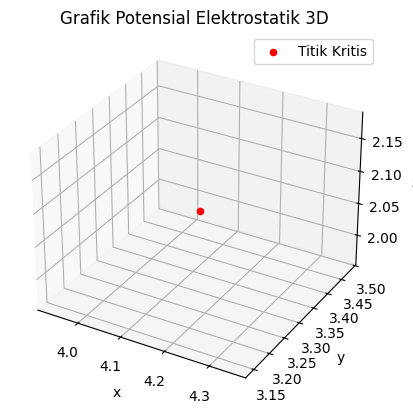

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Fungsi potensial untuk 3D
def V(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return q1 / np.sqrt(x**2 + y**2 + z**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2 + (z - c)**2)

# Turunan pertama
def dV_dx(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return -q1 * x / (x**2 + y**2 + z**2)**(3/2) - q2 * (x - a) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(3/2)

def dV_dy(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return -q1 * y / (x**2 + y**2 + z**2)**(3/2) - q2 * (y - b) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(3/2)

def dV_dz(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return -q1 * z / (x**2 + y**2 + z**2)**(3/2) - q2 * (z - c) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(3/2)

# Turunan kedua
def d2V_dx2(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return q1 * (2*x**2 - y**2 - z**2) / (x**2 + y**2 + z**2)**(5/2) + q2 * (2*(x - a)**2 - (y - b)**2 - (z - c)**2) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

def d2V_dy2(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return q1 * (2*y**2 - x**2 - z**2) / (x**2 + y**2 + z**2)**(5/2) + q2 * (2*(y - b)**2 - (x - a)**2 - (z - c)**2) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

def d2V_dz2(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return q1 * (2*z**2 - x**2 - y**2) / (x**2 + y**2 + z**2)**(5/2) + q2 * (2*(z - c)**2 - (x - a)**2 - (y - b)**2) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

def d2V_dxdy(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return 3 * q1 * x * y / (x**2 + y**2 + z**2)**(5/2) + 3 * q2 * (x - a) * (y - b) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

def d2V_dxdz(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return 3 * q1 * x * z / (x**2 + y**2 + z**2)**(5/2) + 3 * q2 * (x - a) * (z - c) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

def d2V_dydz(x, y, z, a=10, b=8, c=5, q1=1, q2=2):
    return 3 * q1 * y * z / (x**2 + y**2 + z**2)**(5/2) + 3 * q2 * (y - b) * (z - c) / ((x - a)**2 + (y - b)**2 + (z - c)**2)**(5/2)

# Implementasi metode Newton-Raphson 3D
def newton_raphson_3d(x0, y0, z0, tol=1e-6, max_iter=100):
    x, y, z = x0, y0, z0
    history = [(x, y, z)]
    for _ in range(max_iter):
        # Hitung turunan pertama
        fx = dV_dx(x, y, z)
        fy = dV_dy(x, y, z)
        fz = dV_dz(x, y, z)
        
        # Hitung turunan kedua
        fxx = d2V_dx2(x, y, z)
        fyy = d2V_dy2(x, y, z)
        fzz = d2V_dz2(x, y, z)
        fxy = d2V_dxdy(x, y, z)
        fxz = d2V_dxdz(x, y, z)
        fyz = d2V_dydz(x, y, z)
        
        # Bentuk matriks Hessian
        H = np.array([[fxx, fxy, fxz],
                      [fxy, fyy, fyz],
                      [fxz, fyz, fzz]])
        
        # Hitung determinan Hessian
        det_H = np.linalg.det(H)
        
        # Hitung invers Hessian
        try:
            H_inv = np.linalg.inv(H)
        except np.linalg.LinAlgError:
            print("Matriks Hessian singular.")
            return None
        
        # Update nilai x, y, dan z
        delta = H_inv @ np.array([fx, fy, fz])
        x -= delta[0]
        y -= delta[1]
        z -= delta[2]
        
        history.append((x, y, z))
        
        # Cek konvergensi
        if np.linalg.norm(delta) < tol:
            break
    
    return x, y, z, history

# Inisialisasi titik awal
x0, y0, z0 = 5, 5, 5

# Mencari titik kritis
x_crit, y_crit, z_crit, history = newton_raphson_3d(x0, y0, z0)
print(f"Titik kritis ({x_crit}, {y_crit}, {z_crit})")

# Visualisasi grafik 3D
x = np.linspace(-20, 20, 20)
y = np.linspace(-20, 20, 20)
z = np.linspace(-20, 20, 20)
X, Y, Z = np.meshgrid(x, y, z)
V_vals = V(X, Y, Z)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_crit, y_crit, z_crit, color='r', label='Titik Kritis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_title('Grafik Potensial Elektrostatik 3D')
plt.legend()
plt.show()

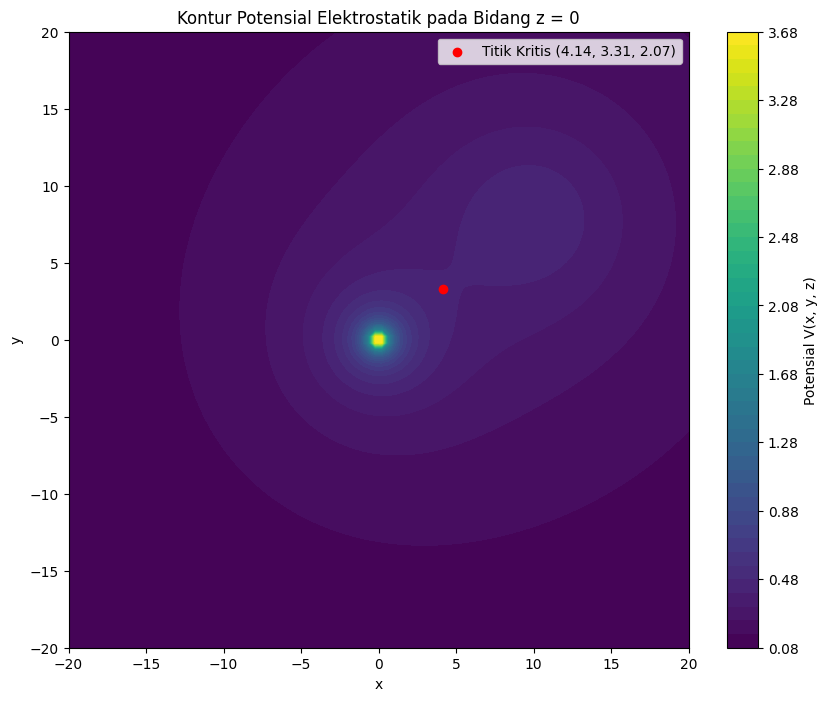

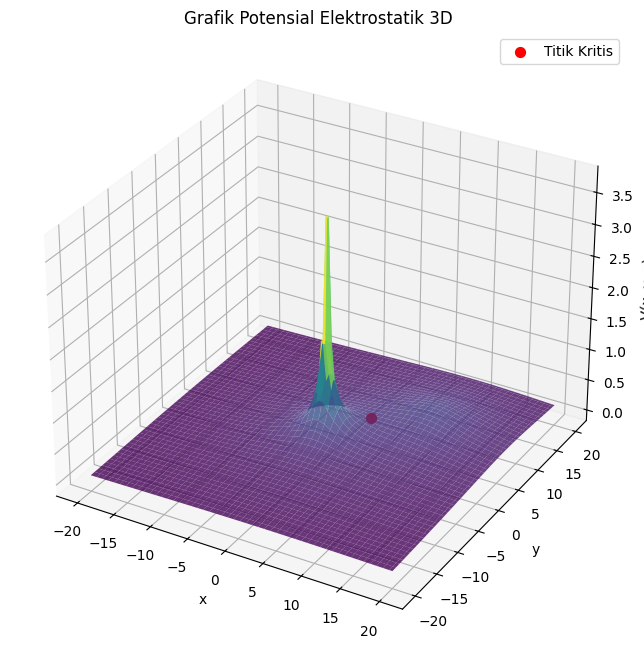

Determinant Hessian di titik kritis (4.14, 3.31, 2.07): 0.000002
Titik kritis adalah local minima atau maxima.


In [2]:
# Visualisasi grafik V(x, y, z) pada bidang z = 0
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # Bidang z = 0
V_vals = V(X, Y, Z)  # Hitung nilai potensial pada bidang z = 0

# Plot kontur 2D untuk bidang z = 0
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, V_vals, levels=50, cmap='viridis')
plt.colorbar(label='Potensial V(x, y, z)')
plt.scatter(x_crit, y_crit, color='red', label=f'Titik Kritis ({x_crit:.2f}, {y_crit:.2f}, {z_crit:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kontur Potensial Elektrostatik pada Bidang z = 0')
plt.legend()
plt.show()

# Visualisasi grafik 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_vals, cmap='viridis', alpha=0.8)
ax.scatter(x_crit, y_crit, V(x_crit, y_crit, z_crit), color='red', s=50, label='Titik Kritis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y, z)')
ax.set_title('Grafik Potensial Elektrostatik 3D')
plt.legend()
plt.show()

# Hitung determinan matriks Hessian di titik kritis
fxx = d2V_dx2(x_crit, y_crit, z_crit)
fyy = d2V_dy2(x_crit, y_crit, z_crit)
fzz = d2V_dz2(x_crit, y_crit, z_crit)
fxy = d2V_dxdy(x_crit, y_crit, z_crit)
fxz = d2V_dxdz(x_crit, y_crit, z_crit)
fyz = d2V_dydz(x_crit, y_crit, z_crit)

# Matriks Hessian
H = np.array([[fxx, fxy, fxz],
              [fxy, fyy, fyz],
              [fxz, fyz, fzz]])

# Determinan Hessian
det_H = np.linalg.det(H)
print(f"Determinant Hessian di titik kritis ({x_crit:.2f}, {y_crit:.2f}, {z_crit:.2f}): {det_H:.6f}")

# Analisis titik kritis berdasarkan determinan Hessian
if det_H < 0:
    print("Titik kritis adalah saddle point.")
elif det_H > 0:
    print("Titik kritis adalah local minima atau maxima.")
else:
    print("Titik kritis tidak dapat ditentukan (determinant = 0).")

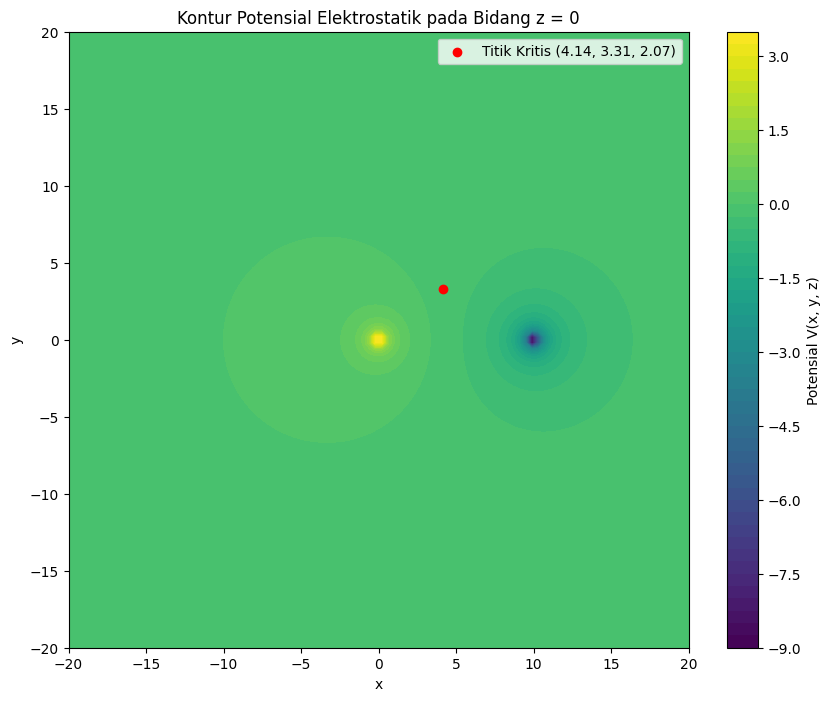

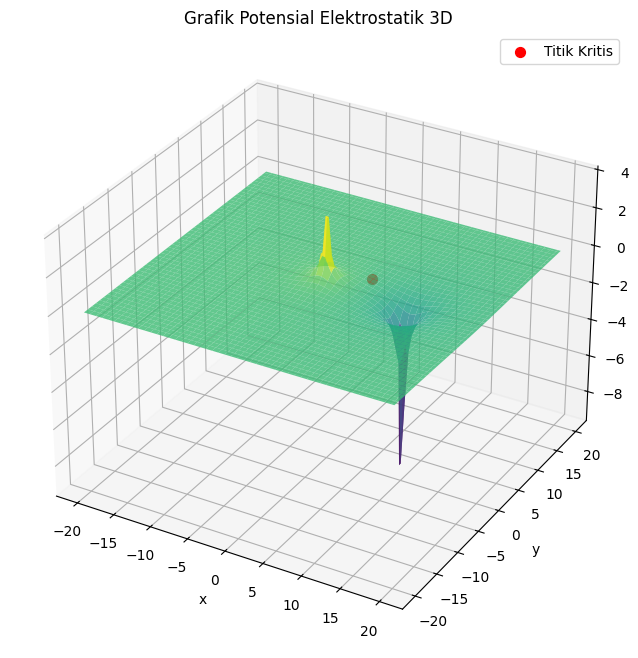

Determinant Hessian di titik kritis (4.14, 3.31, 2.07): -0.000000
Titik kritis adalah saddle point.


In [3]:
# Modifikasi parameter untuk memastikan saddle point
# Posisi muatan q2 diubah untuk menghasilkan saddle point
a, b, c = 10, 0, 0  # Posisi q2
q1, q2 = 1, -2      # Nilai muatan q1 dan q2 (q2 negatif untuk interaksi berbeda)

# Fungsi potensial tetap sama
def V(x, y, z, a=a, b=b, c=c, q1=q1, q2=q2):
    return q1 / np.sqrt(x**2 + y**2 + z**2) + q2 / np.sqrt((x - a)**2 + (y - b)**2 + (z - c)**2)

# Jalankan kembali metode Newton-Raphson untuk mencari titik kritis
x0, y0, z0 = 5, 5, 5  # Titik awal
x_crit, y_crit, z_crit, history = newton_raphson_3d(x0, y0, z0)

# Visualisasi grafik V(x, y, z) pada bidang z = 0
x = np.linspace(-20, 20, 100)
y = np.linspace(-20, 20, 100)
X, Y = np.meshgrid(x, y)
Z = np.zeros_like(X)  # Bidang z = 0
V_vals = V(X, Y, Z)  # Hitung nilai potensial pada bidang z = 0

# Plot kontur 2D untuk bidang z = 0
plt.figure(figsize=(10, 8))
plt.contourf(X, Y, V_vals, levels=50, cmap='viridis')
plt.colorbar(label='Potensial V(x, y, z)')
plt.scatter(x_crit, y_crit, color='red', label=f'Titik Kritis ({x_crit:.2f}, {y_crit:.2f}, {z_crit:.2f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Kontur Potensial Elektrostatik pada Bidang z = 0')
plt.legend()
plt.show()

# Visualisasi grafik 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, V_vals, cmap='viridis', alpha=0.8)
ax.scatter(x_crit, y_crit, V(x_crit, y_crit, z_crit), color='red', s=50, label='Titik Kritis')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('V(x, y, z)')
ax.set_title('Grafik Potensial Elektrostatik 3D')
plt.legend()
plt.show()

# Hitung determinan matriks Hessian di titik kritis
fxx = d2V_dx2(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)
fyy = d2V_dy2(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)
fzz = d2V_dz2(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)
fxy = d2V_dxdy(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)
fxz = d2V_dxdz(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)
fyz = d2V_dydz(x_crit, y_crit, z_crit, a=a, b=b, c=c, q1=q1, q2=q2)

# Matriks Hessian
H = np.array([[fxx, fxy, fxz],
              [fxy, fyy, fyz],
              [fxz, fyz, fzz]])

# Determinan Hessian
det_H = np.linalg.det(H)
print(f"Determinant Hessian di titik kritis ({x_crit:.2f}, {y_crit:.2f}, {z_crit:.2f}): {det_H:.6f}")

# Analisis titik kritis berdasarkan determinan Hessian
if det_H < 0:
    print("Titik kritis adalah saddle point.")
elif det_H > 0:
    print("Titik kritis adalah local minima atau maxima.")
else:
    print("Titik kritis tidak dapat ditentukan (determinant = 0).")